Name: Nikolaos Katsaidonis

Date: 18/12/2024

Studen of Electrical and Computer Engineering National Technical Universitry Athens

In [ ]:
#1a Loading image and labels
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

#Loading image and labels
image= '/content/drive/MyDrive/Machine_Learning_Project2/salinas_image.npy'
labels ='/content/drive/MyDrive/Machine_Learning_Project2/salinas_labels.npy'

image = np.load(image)
labels = np.load(labels)

print("Image loaded")
print("Labels loaded")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image loaded
Labels loaded


The annotations you loaded map each pixel of the hyperspectral image to one type out of 16 different categories:
```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

In [ ]:
#2a Understanding the data
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")

Height: 512, Width: 217, Channels: 204


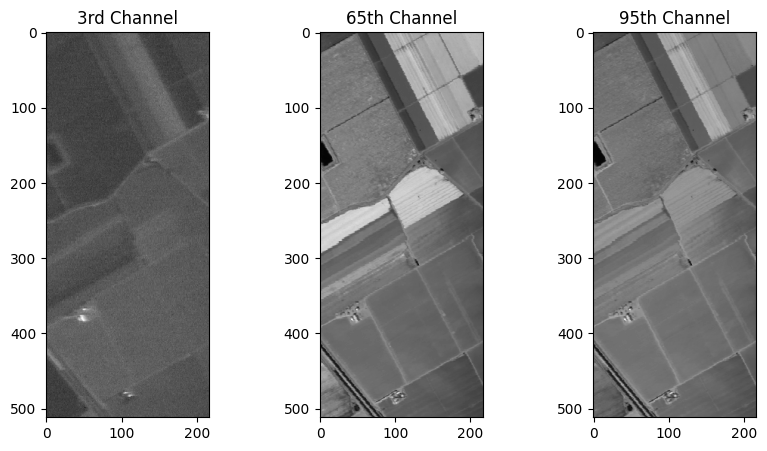

In [ ]:
#2b Plotting 3rd, 65th and 95th channel
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

#3rd channel
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, 2], cmap='gray')
plt.title('3rd Channel')

#65th channel
plt.subplot(1, 3, 2)
plt.imshow(image[:, :, 64], cmap='gray')
plt.title('65th Channel')

#95th channel
plt.subplot(1, 3, 3)
plt.imshow(image[:, :, 94], cmap='gray')
plt.title('95th Channel')

plt.show()

In [ ]:
#2c Understanding labels matrix
unique_labels = np.unique(labels)
print(f"Number of unique labels: {len(unique_labels)}")
print(unique_labels)
print("\n")

print(labels.shape)
print(f"A random row of labels matrix seem like this:{labels[4]}")
print(f"As we can see, labels is a {height}x{width} matrix containing numbers from 0 to 16. Each element is the class in which the pixel belongs")

Number of unique labels: 17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


(512, 217)
A random row of labels matrix seem like this:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 0 0 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 7 7
 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
As we can see, labels is a 512x217 matrix containing numbers from 0 to 16. Each element is the class in which the pixel belongs


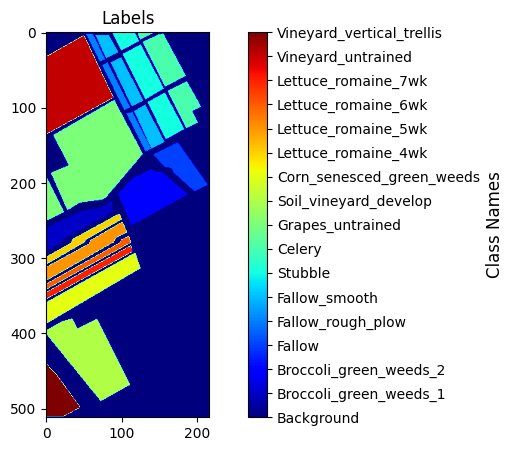

In [ ]:
#2d True labels
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

plt.figure(figsize=(10, 5))
plt.imshow(labels, cmap='jet')
plt.title('Labels')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Class Names', fontsize=12)
plt.show()

In [ ]:
#2e Counting the number of pixels in each label

#Dictionary to store the pixels number
labels_dict = {
    "Background": 0,
    "Broccoli_green_weeds_1": 0,
    "Broccoli_green_weeds_2": 0,
    "Fallow": 0,
    "Fallow_rough_plow": 0,
    "Fallow_smooth": 0,
    "Stubble": 0,
    "Celery": 0,
    "Grapes_untrained": 0,
    "Soil_vineyard_develop": 0,
    "Corn_senesced_green_weeds": 0,
    "Lettuce_romaine_4wk": 0,
    "Lettuce_romaine_5wk": 0,
    "Lettuce_romaine_6wk": 0,
    "Lettuce_romaine_7wk": 0,
    "Vineyard_untrained": 0,
    "Vineyard_vertical_trellis": 0
}

#Counting the pixels for each label
for i in range(height):
    for j in range(width):
        labels_dict[classes[labels[i, j]]] += 1

for label, count in labels_dict.items():
    print(f"{label}: {count} pixels")


print(f"\nTotal number of pixels is {height*width}.")



Background: 56975 pixels
Broccoli_green_weeds_1: 2009 pixels
Broccoli_green_weeds_2: 3726 pixels
Fallow: 1976 pixels
Fallow_rough_plow: 1394 pixels
Fallow_smooth: 2678 pixels
Stubble: 3959 pixels
Celery: 3579 pixels
Grapes_untrained: 11271 pixels
Soil_vineyard_develop: 6203 pixels
Corn_senesced_green_weeds: 3278 pixels
Lettuce_romaine_4wk: 1068 pixels
Lettuce_romaine_5wk: 1927 pixels
Lettuce_romaine_6wk: 916 pixels
Lettuce_romaine_7wk: 1070 pixels
Vineyard_untrained: 7268 pixels
Vineyard_vertical_trellis: 1807 pixels

Total number of pixels is 111104.


In [ ]:
#3a reshaping

reshaped_image = image.reshape(height*width, channels)
reshaped_labels = labels.reshape(height*width)
print(f"Image reshaped to {reshaped_image.shape}")
print(f"Labels reshaped to {reshaped_labels.shape}")

Image reshaped to (111104, 204)
Labels reshaped to (111104,)


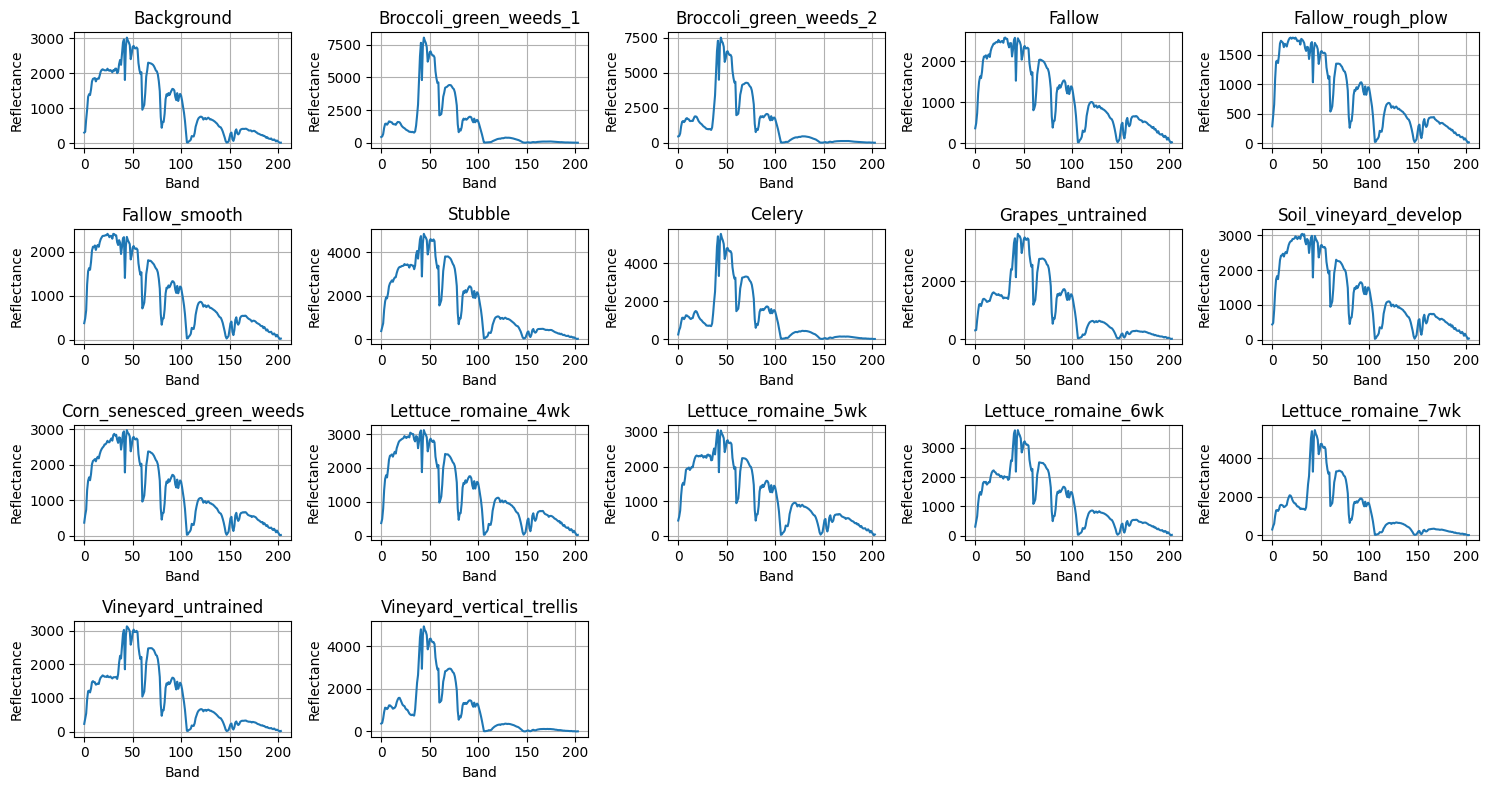

In [ ]:
#3b Chooing a random pixel of each label and plotting its spectral signature

import numpy as np
import matplotlib.pyplot as plt

# Storing pixels' indices for each class
class_pixel_indices = {i: np.where(reshaped_labels == i)[0] for i in range(len(classes))}


#Choice of a random pixel of each class and plotting its spectral signature

plt.figure(figsize=(15, 8))

for i, class_id in enumerate(class_pixel_indices):
    if class_pixel_indices[class_id].size > 0:  #Check if we have pixels for the class
        random_pixel_index = np.random.choice(class_pixel_indices[class_id])  #Random choice of pixel
        spectral_signature = reshaped_image[random_pixel_index]  #Spectral signature of the pixel

        plt.subplot(4, 5, i+1)
        plt.plot(spectral_signature)
        plt.grid(True)
        plt.title(classes[class_id])
        plt.xlabel("Band")
        plt.ylabel("Reflectance")

plt.tight_layout()
plt.show()




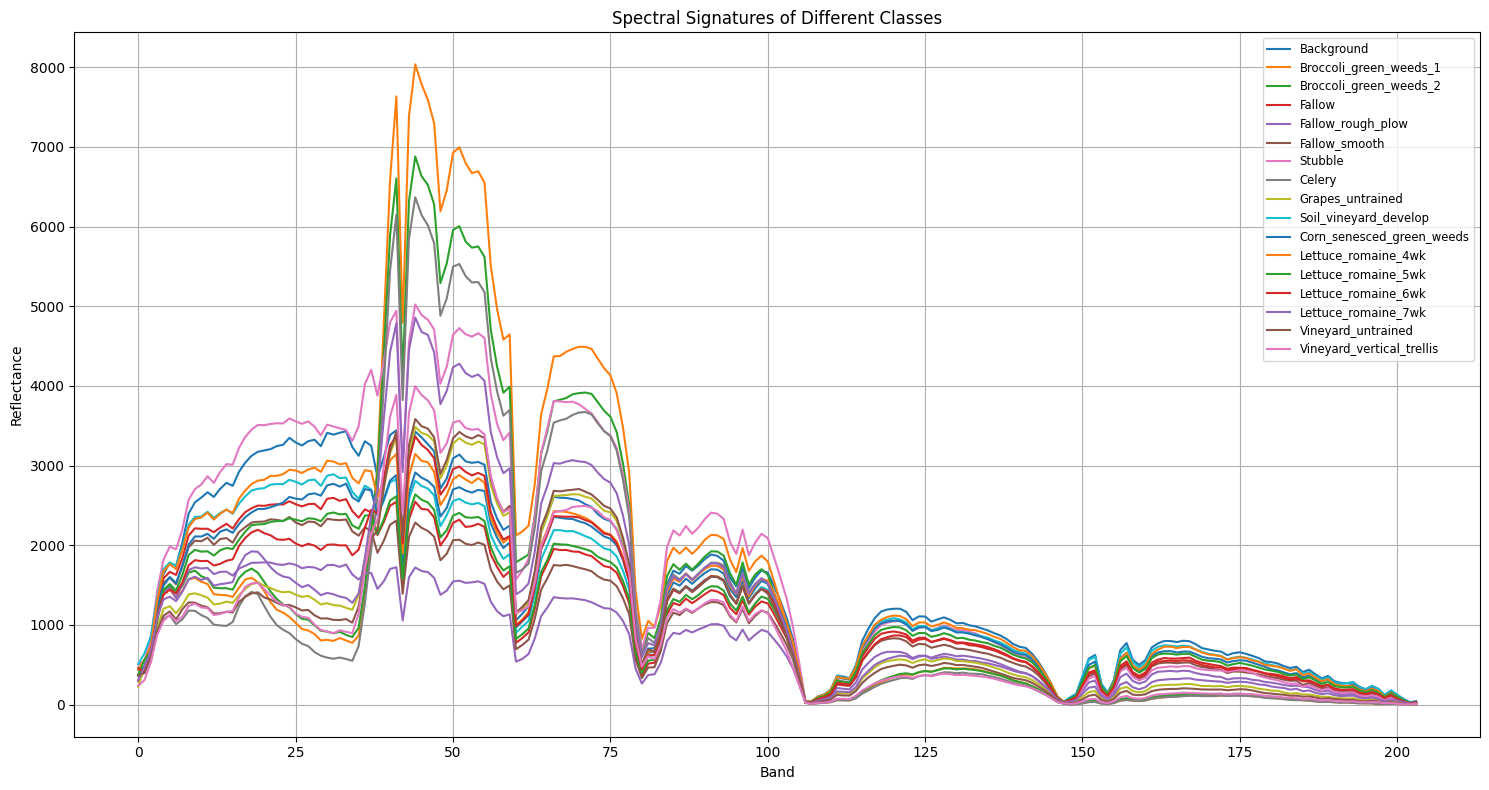

In [ ]:
#Plotting in common graph to see the differences more distinct

import numpy as np
import matplotlib.pyplot as plt

# Storing pixels' indices for each class
class_pixel_indices = {i: np.where(reshaped_labels == i)[0] for i in range(len(classes))}

# Initialize plot
plt.figure(figsize=(15, 8))

# Loop through each class and plot spectral signatures on the same diagram
for class_id in class_pixel_indices:
    if class_pixel_indices[class_id].size > 0:  # Check if we have pixels for the class
        random_pixel_index = np.random.choice(class_pixel_indices[class_id])  # Random choice of pixel
        spectral_signature = reshaped_image[random_pixel_index]  # Spectral signature of the pixel

        # Plot the spectral signature with label for the class
        plt.plot(spectral_signature, label=classes[class_id])

# Adding labels, legend, and grid
plt.grid(True)
plt.legend(loc='upper right', fontsize='small')  # Legend with class names
plt.title("Spectral Signatures of Different Classes")
plt.xlabel("Band")
plt.ylabel("Reflectance")
plt.tight_layout()
plt.show()


**3c) Observations:**


We observe that in channels 90-204 and possibly in channels 0-25, the crops are not easily distinguishable as the light reflection, which we measure, is quite similar. Additionally, channels 25-90 clearly highlight the differences between the crops.

Furthermore, crops that are similar (e.g., Broccoli_green_weeds1 and Broccoli_green_weeds2) have similar spectral signatures, making clustering among similar crops challenging.


Text(0.5, 1.0, 'Correlation Heatmap')

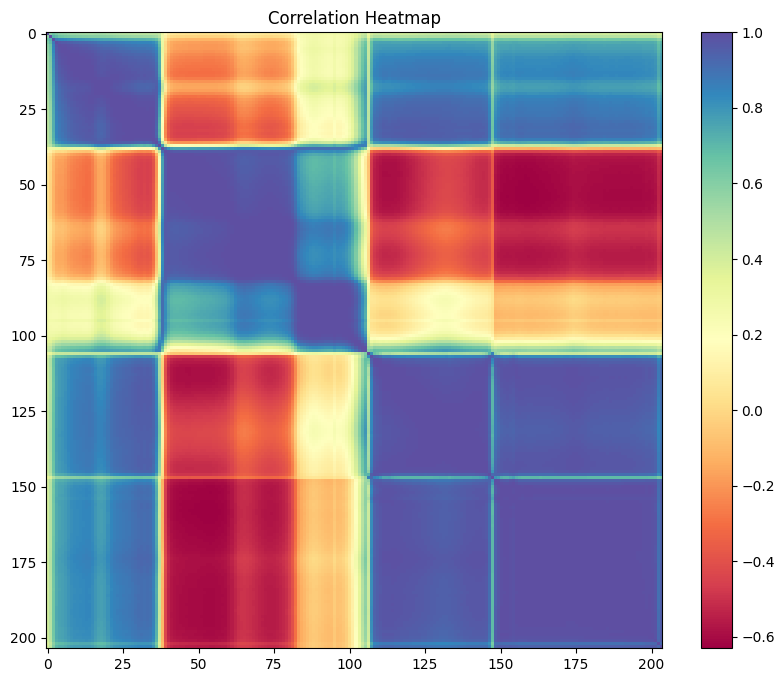

In [ ]:
#3d Correlation matrix for the channels

correlation = np.corrcoef(reshaped_image, rowvar=False)
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='Spectral', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')


### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans


We will evaluate the algorithm's performance using the following metrics:
* Adjusted Rand Index
* Silhouette Score

Adjusted Rand Index (ARI) calculates how many pairs of points are correctly classified either in the same cluster or in different clusters, using the true labels while accounting for random matches. Values range from -1 (very poor clustering) to 1 (perfect alignment with the categories). A value of 0 indicates random clustering. This metric is particularly useful for evaluating accuracy on data with known categories (ground truth).

Silhouette Score measures how well a data point fits into its assigned cluster relative to the other clusters. It calculates the average distance of a point from the other points in its cluster (cohesion) and its average distance from points in the nearest other cluster (separation). Scores range from -1 to 1, where 1 indicates well-defined clusters, 0 indicates overlapping clusters, and negative values indicate poor clustering (e.g., points assigned to the wrong cluster).

Silhouette Score is an internal evaluation metric, examining the consistency and separation of clusters without considering true labels. In contrast, Adjusted Rand Index (ARI) is an external evaluation metric that compares the clusters with the true categories (ground truth). Using both together provides a comprehensive view of clustering quality.

In [ ]:
#4a Applying k-menas with n_cluster=17 and measure the quality of our clustering with metrics ARI and Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

#K-means
kmeans = KMeans(n_clusters=17, random_state=0)
kmeans_labels = kmeans.fit_predict(reshaped_image)

#Metrics
ari = adjusted_rand_score(reshaped_labels, kmeans.labels_)
silhouette = silhouette_score(reshaped_image, kmeans.labels_)

print(f'Adjusted Rand Index: {ari}')
print(f'Silhouette Score: {silhouette}')




Adjusted Rand Index: 0.14285393517763426
Silhouette Score: 0.40339775554605456


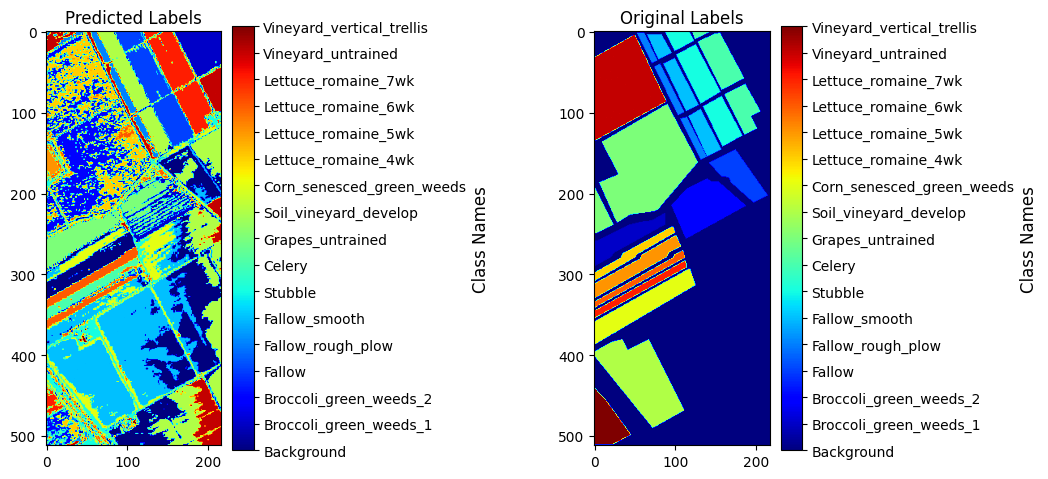

In [ ]:
#4b Plotting the predicted labels and comparing with the original ones

plt.figure(figsize=(10, 5))

kmeans_labels = kmeans_labels.reshape(height, width)

#Plotting the predicted labels after k-means
plt.subplot(1, 2, 1)
plt.imshow(kmeans_labels, cmap='jet')
plt.title('Predicted Labels')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Class Names', fontsize=12)

#Plotting the original labels
plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='jet')
plt.title('Original Labels')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Class Names', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=1.5)
plt.show()


We observe that the clustering we performed did not yield sufficiently good results. Specifically, the colors in most crops do not match the original ones, as there appears to be an overlap between many groups and colors. The only part that seems to somewhat approach the expected outcome is the background, which is in shades of blue, but even this is affected by distortion from the light blue of the Fallow crops.








In [ ]:
#Installing library for fuzzy C-means
!pip install fuzzy-c-means

In [ ]:
#4c Applying fuzzy C-means and measure the quality of our clustering with metrics ARI and Silhouette Score

import numpy as np
from fcmeans import FCM
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Fuzzy C-means
fcm = FCM(n_clusters=17, random_state=0)
fcm.fit(reshaped_image)
fcm_labels = fcm.predict(reshaped_image)

#Metrics
fuzzy_ari = adjusted_rand_score(reshaped_labels, fcm_labels)
fuzzy_silhouette = silhouette_score(reshaped_image, fcm_labels)

print(f'Fuzzy C-means Adjusted Rand Index: {fuzzy_ari}')
print(f'Fuzzy C-means Silhouette Score: {fuzzy_silhouette}')

Fuzzy C-means Adjusted Rand Index: 0.12730646806016094
Fuzzy C-means Silhouette Score: 0.34903976915709883


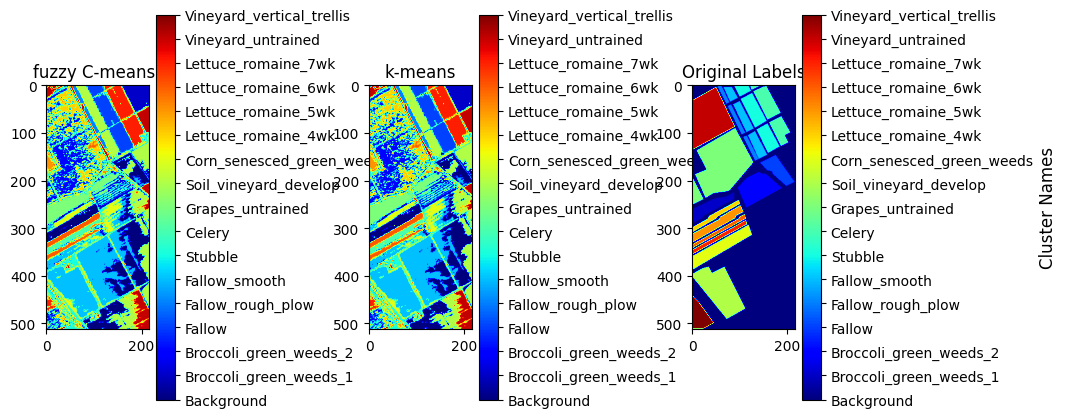

In [ ]:

plt.figure(figsize=(10, 5))
fcm_labels = fcm_labels.reshape(height, width)

#Plotting the predicted labels after fuzzy C-means
plt.subplot(1, 3, 1)
plt.imshow(fcm_labels, cmap='jet')
plt.title('fuzzy C-means)')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Cluster Names', fontsize=12)


#Plotting the predicted labels after k-means
plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='jet')
plt.title('k-means')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Cluster Names', fontsize=12)


#Plotting the original labels
plt.subplot(1, 3, 3)
plt.imshow(labels, cmap='jet')
plt.title('Original Labels')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Cluster Names', fontsize=12)

#plt.tight_layout()
plt.subplots_adjust(wspace=1.5)
plt.show()


**Observations**

Παρατηρούμε ότι ο ARI καθώς και ο Silhouette μειώθηκαν σε σχέση με τον K-means(ARI=0.127 & Silhouette Score=0.349 **έναντι** ARI=0.143 & Silhouette Score=0.403 ).

Ο K-Means δημιουργεί σαφείς ομάδες και αποδίδει καλύτερα σε μετρικές όπως το ARI και το Silhouette Score, οι οποίες ευνοούν τις σκληρές ομαδοποιήσεις δηλαδή ομαδποιήσεις όπου **κάθε διάνυσμα ανήκει σε μία μονο ομάδα.**

Αντίθετα, **ο FCM παράγει "θολές" ομάδες, επιτρέποντας στα σημεία να ανήκουν σε πολλές ομάδες ταυτόχρονα**. Αυτό είναι χρήσιμο όταν τα δεδομένα έχουν επικαλυπτόμενα όρια, αλλά οι μετρικές αυτές συχνά δίνουν χαμηλότερες τιμές στον FCM, επειδή δεν αποτυπώνουν πλήρως τη θολότητα. Οι χαμηλότερες τιμές είναι αναμενόμενες και δεν σημαίνουν ότι ο FCM αποτυγχάνει, **αλλά ότι αξιολογείται με μετρικές λιγότερο κατάλληλες για θολές ομαδοποιήσεις.** Αυτό διότι στον fcm **τα σημεία των διαφορετικών ομάδων βρίσκονται κοντά αφού αυτά των ίδιων ομάδων είναι αραία μεταξύ τους. **Δηλαδή έχουμε πιθανότητα επικαλυπτόμενων ομάδων και άρα δείκτες όπως ο Silhouette Score που δείχνει την διακριτότητα των ομάδων μπορούν να βγούν χαμηλοί.**

We observe that both ARI and Silhouette Score decreased compared to K-means (ARI=0.127 & Silhouette Score=0.349 versus ARI=0.143 & Silhouette Score=0.403).

K-Means creates distinct groups and performs better on metrics such as ARI and Silhouette Score, which favor hard clustering, meaning clustering where each vector belongs to a single group.

On the other hand, FCM produces "fuzzy" clusters, allowing points to belong to multiple groups simultaneously. This is useful when the data have overlapping boundaries, but these metrics often yield lower values for FCM because they do not fully capture the fuzziness. The lower values are expected and do not mean that FCM fails, **but rather that it is evaluated with metrics less suitable for fuzzy clustering.** This happens because, in FCM, the points of different groups are close to each other, while those of the same group are sparse. **In other words, there is a likelihood of overlapping clusters, and thus, metrics such as Silhouette Score, which indicate the distinctiveness of clusters, may yield low scores.**

In [ ]:
# We will apply PCA and we will reduce our datas' dimension to n_components=3
from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components=3, random_state=0)
pca_reshaped_image = pca.fit_transform(reshaped_image)

In [ ]:
#5b

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total variance retained
total_variance = explained_variance_ratio.sum()

# Print the result
print(f"Total variance retained with n_components=3: {total_variance:.4f}")

Total variance retained with n_components=3: 0.9914


Practically, the percentage of variance retained by the first three principal components indicates how well your data representation remains when reducing the dimensionality from its original dimension to just three dimensions.

We found 99.14%, which means that the information is largely preserved after applying PCA.

In [ ]:
#6a K-means after PCA and metrics

#K-means afetr pca
kmeans = KMeans(n_clusters=17, random_state=0)
pca_kmeans_labels = kmeans.fit_predict(pca_reshaped_image)

#Metrics
pca_kmenas_ari = adjusted_rand_score(reshaped_labels, pca_kmeans_labels)
pca_kmeans_silhouette = silhouette_score(pca_reshaped_image, pca_kmeans_labels)

print(f'PCA Adjusted Rand Index: {pca_kmenas_ari}')
print(f'PCA Silhouette Score: {pca_kmeans_silhouette}')

PCA Adjusted Rand Index: 0.16638098390173864
PCA Silhouette Score: 0.43644318582362884


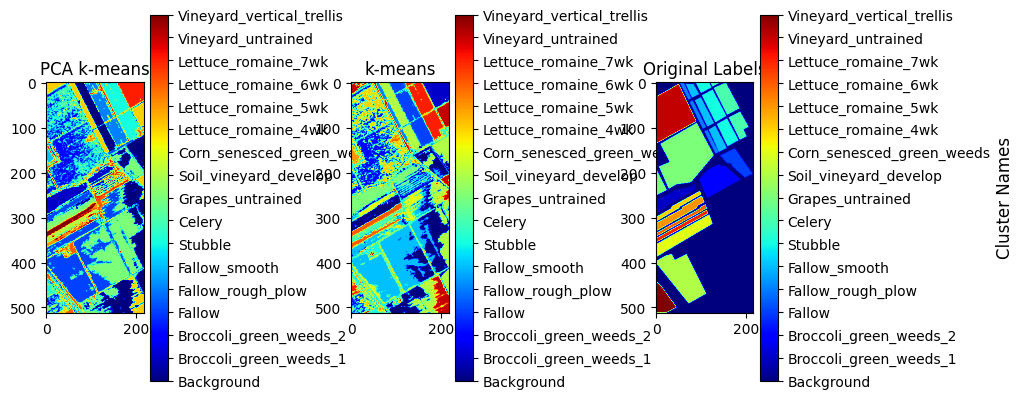

In [ ]:
plt.figure(figsize=(10, 5))
pca_kmeans_labels = pca_kmeans_labels.reshape(height, width)

#Plotting the predicted labels after PCA k-means
plt.subplot(1, 3, 1)
plt.imshow(pca_kmeans_labels, cmap='jet')
plt.title('PCA k-means')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Cluster Names', fontsize=12)


#Plotting the predicted labels after k-means
plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='jet')
plt.title('k-means')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Cluster Names', fontsize=12)


#Plotting the original labels
plt.subplot(1, 3, 3)
plt.imshow(labels, cmap='jet')
plt.title('Original Labels')
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.set_ticklabels(classes)
cbar.set_label('Cluster Names', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=1.5)
plt.show()


**Observations:**


We observe that both ARI and Silhouette Score for PCA K-means increased slightly compared to simple K-means (ARI=0.166 & Silhouette Score=0.436 versus ARI=0.143 & Silhouette Score=0.403).



*   This improvement indicates that dimensionality reduction helped the K-Means algorithm identify "cleaner" clusters in the data.

*   Noise removal: Dimensionality reduction often eliminates features with low contribution to the overall variance of the data. This leads to more distinct clusters.


*   The increases in the metrics suggest that the data contained excessive information that "confused" the algorithm.






In [ ]:
#6b K-means with different PCA dimensions and metrics comparison for dimensions=1,2,3,4,5

ari_dict = {}
silhouette_dict = {}

#PCA with dimensions from1 to 5
for n_components in range(1, 6):
  pca = PCA(n_components=n_components, random_state=0)
  pca_reshaped_image = pca.fit_transform(reshaped_image)

#K-means for each dimension
  kmeans = KMeans(n_clusters=17, random_state=0)
  pca_kmeans_labels = kmeans.fit_predict(pca_reshaped_image)

#Mterics for each dimension k-means
  ari_dict[n_components] = adjusted_rand_score(reshaped_labels, pca_kmeans_labels)
  silhouette_dict[n_components] = silhouette_score(pca_reshaped_image, pca_kmeans_labels)

  print(f'K-means PCA with dimension={n_components} Adjusted Rand Index: {ari_dict[n_components]}')
  print(f'K-means PCA with dimension={n_components} Silhouette Score: {silhouette_dict[n_components]}\n')



K-means PCA with dimension=1 Adjusted Rand Index: 0.14352038449548868
K-means PCA with dimension=1 Silhouette Score: 0.5398057904345053

K-means PCA with dimension=2 Adjusted Rand Index: 0.14908370048429315
K-means PCA with dimension=2 Silhouette Score: 0.4683283184664401

K-means PCA with dimension=3 Adjusted Rand Index: 0.16638098390173864
K-means PCA with dimension=3 Silhouette Score: 0.43644318582362884

K-means PCA with dimension=4 Adjusted Rand Index: 0.1624522785890759
K-means PCA with dimension=4 Silhouette Score: 0.41836406066630216

K-means PCA with dimension=5 Adjusted Rand Index: 0.17153345166072165
K-means PCA with dimension=5 Silhouette Score: 0.4215198775312559



Text(0, 0.5, 'Silhouette Score Value')

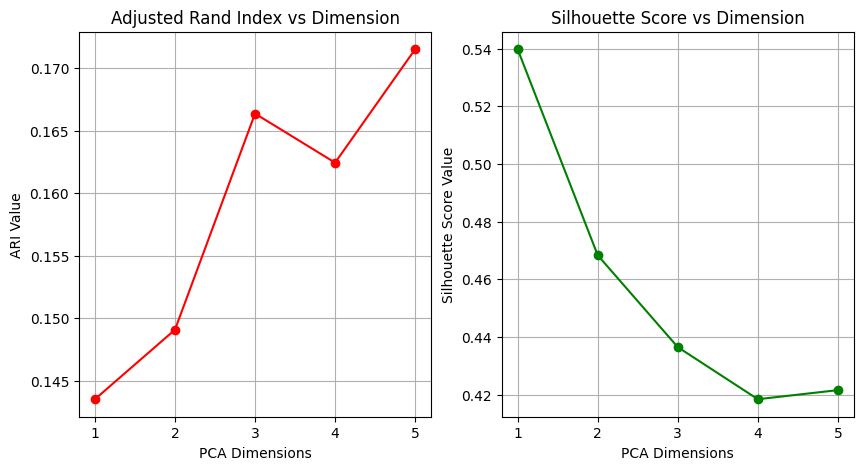

In [ ]:
#Diagrams that shows the results for each PCA dimension case

X=[1,2,3,4,5]
ari_list = list(ari_dict.values())
silhouette_list = list(silhouette_dict.values())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(X, ari_list, marker='o', color="red")
plt.grid(True)
plt.title('Adjusted Rand Index vs Dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('ARI Value')

plt.subplot(1, 2, 2)
plt.plot(X, silhouette_list, marker='o',color="green")
plt.grid(True)
plt.title('Silhouette Score vs Dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Silhouette Score Value')


**Observations:**

*   According to the above graphs, we conclude that the ARI metric generally increases as the number of dimensions increases, with the highest value occurring for n=5. This likely happens because, with more dimensions, the K-Means algorithm has access to more information about the structure of the data, and thus the predicted labels better approximate the true ones.



*   On the other hand, the Silhouette Score decreases as the dimension increases from 1 to 5. This may be due to the increased difficulty of the K-Means algorithm in separating the clusters when the dimensions increase, causing the points within a cluster to become less "close" to each other and increasing the distance from points in other clusters. In the case of very low dimensions, the algorithm may perform better because the clusters are more distinct. It is likely that with the increase in dimensions, the number of clusters increases (due to more information about the data), leading to less distinct clusters with more overlap, which is reflected by this metric.




# Part 2: Using a Pre-trained CNN for Clustering

In this section, we will use the Keras library, which provides easy integration of pre-trained CNN models and convenience in data management. Our goal is to highlight the power of features extracted from pre-trained CNNs (Convolutional Neural Networks) for clustering remote sensing data.

We will use a subset of the EuroSAT dataset, which consists of satellite images distributed across 10 categories (e.g., crops, forests, urban areas). The features we extract from a pre-trained CNN will be used for grouping the images.



In [ ]:
#2.1.a Downloading Eurosat which contains satelite images organised in folders per category

!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
! unzip EuroSAT.zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: 2750/SeaLake/SeaLake_2206.jpg  
  inflating: 2750/SeaLake/SeaLake_1313.jpg  
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  infl

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# Specify the directory containing the dataset
data_dir = os.path.join('2750')
print(f'The data is located at: {data_dir}')

# Normalization and data loading
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # Apply preprocessing specific to MobileNetV3
    validation_split=0.90  # Load a small portion from each class for faster runs
                            # by setting a high validation percentage and using the training subset
)

# Create a dataset generator
dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # MobileNetV3 expects images of size 224 x 224
    batch_size=1,          # Each call to the iterator loads one image-label pair
    shuffle=False,         # Ensure images are not shuffled for this configuration
    subset='training'      # Load the training subset as per the validation split
)

# Print the total number of images loaded
print(f'{len(dataset) * dataset.batch_size} images were loaded.')






Τα δεδομένα βρίσκονται στο: 2750
Found 2700 images belonging to 10 classes.
Φορτώθηκαν 2700 εικόνες.


In [ ]:
#2a

from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model

# Load the pretrained MobileNetV3Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, pooling='avg') #We exclude the final MLP layer so that we can get only the features and not applying the classification


/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [ ]:
# Extract features from the dataset using CNN without using the final classification MLP layer
features = base_model.predict(dataset, verbose=1)

print(f"Extracted features shape: {features.shape}")

2700/2700 ━━━━━━━━━━━━━━━━━━━━ 62s 23ms/step
Extracted features shape: (2700, 576)


In [ ]:
#2c  We apply k-means in the features vector we got from CNN

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

true_labels = dataset.classes

# Apply KMeans
kmeans_cnn = KMeans(n_clusters=10, random_state=0)
cnn_labels = kmeans_cnn.fit_predict(features)

ari_cnn = adjusted_rand_score(true_labels, cnn_labels)

print(f"CNN K-means Adjusted Rand Index : {ari_cnn}")


CNN K-means Adjusted Rand Index : 0.47883260285709683


In [ ]:
#Now we will do the clustering using the pixels of the images like the first part and not the features vector from CNN

import numpy as np

# Load the same subset of images used in KMeans
images, labels = [], []
for i in range(len(dataset)):
    image, label = dataset[i]
    images.append(image.flatten())
    labels.append(label)


# Convert to numpy arrays
images_np = np.array(images)  # Shape: (N, M), where M = total pixels per image and N=number of images
labels_np = np.argmax(np.array(labels), axis=-1)  # Convert one-hot to single integer label
labels_np = labels_np.ravel()


# Print shapes for confirmation
print(f"Pixel feature shape: {images_np.shape}")  # Example: (2700, 224*224*3)
print(f"True labels shape: {labels_np.shape}")  # Example: (2700,)

# Normalize pixel values to the range [0, 1]
images_np = images_np / 255.0





Pixel feature shape: (2700, 150528)
True labels shape: (2700,)


In [ ]:
print(f"Max value of pixels: {images_np.max()}")
print(f"Min value of pixels: {images_np.min()}")
print("As we can see the values of the pixels normalized to [0,1]")

Max value of pixels: 1.0
Min value of pixels: 0.06666667014360428
As we can see the values of the pixels normalized to [0,1]


In [ ]:
# Apply KMeans on pixel data
kmeans_pixel = KMeans(n_clusters=10, random_state=0)
predicted_labels = kmeans_pixel.fit_predict(images_np)

# Calculate ARI
ari = adjusted_rand_score(labels_np, predicted_labels)

print(f"Adjusted Rand Index (Pixel Features): {ari:}")

Adjusted Rand Index (Pixel Features): 0.14080328437690454


**Observations:**

We observe that the ARI without CNN decreased compared to with CNN (ARI=0.1408 versus ARI=0.4788).

In [ ]:
#We will visualize the result so that we can see which method (CNN and pixel process) gave us a better clustering


def plot_grid_for_clusters(features, labels, dataset, title, num_images=5):
    """
    Visualize a grid of images for each cluster.

    Args:
        features (array): Image features (CNN or pixel-based).
        labels (array): Cluster labels from KMeans.
        dataset: Original dataset object for retrieving images.
        title (str): Title for the plot.
        num_images (int): Number of random images to display per cluster.
    """
    num_clusters = len(set(labels))
    plt.figure(figsize=(20, num_clusters * 4))

    for cluster in range(num_clusters):
        # Find indices for the current cluster
        cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster]

        # Select random indices (up to num_images)
        selected_indices = np.random.choice(cluster_indices, size=min(len(cluster_indices), num_images), replace=False)

        for idx, selected_index in enumerate(selected_indices):
            image, _ = dataset[selected_index]  # Load image

            # Undo preprocessing normalization for visualization
            image = (image + 1) / 2.0  # Convert from [-1, 1] to [0, 1]
            if image.shape[0] == 1:  # Remove batch dimension if exists
                image = np.squeeze(image, axis=0)
            image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1]

            # Plot the image
            plt.subplot(num_clusters, num_images, cluster * num_images + idx + 1)
            plt.imshow(image)
            plt.title(f"Cluster {cluster}")
            plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.show()



In [ ]:
plot_grid_for_clusters(
    features=features,
    labels=cnn_labels,
    dataset=dataset,
    title="Cluster Examples (CNN Features)"
)

plot_grid_for_clusters(
    features=images_np,
    labels=labels_np,
    dataset=dataset,
    title="Cluster Examples (Pixel Features)"
)


Output hidden; open in https://colab.research.google.com to view.

**Observations:**




**CNN Clustering:** We see that images within the same clusters show a high degree of similarity in terms of shape. For example, in cluster0, we observe images that resemble forested areas, in cluster4, crops, and in cluster6, urban areas.

**Pixel Clustering:** Here, we observe that the images within the same group depict similar regions, but the clusters show a slight error compared to those of CNN.

Therefore, images in the same group exhibit similarity in both methods, but in the second method, more errors and "inconsistent images" are clearly observed.
